<a href="https://colab.research.google.com/github/kumarmanoj55/ML_Projects/blob/main/Customer_segmentation_using_K_mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Data Collection And Analysis

In [ ]:
#loadint the data from csv file to a pandas Data frame
Customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
Customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#checkin for null values
Customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
Customer_data.shape

(200, 5)

In [ ]:
#checkin duplicate values
Customer_data['CustomerID'].duplicated()

,CustomerID
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
#getting som einformation about the data set
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#choosing the Annual Income column and Spending score column
x = Customer_data.iloc[:,[3,4]]


In [ ]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Choosing the number of clusters

WCSS--> Within Cluster Sum of Square

In [ ]:
# finding wcss value for different number of clusters
wcss=[]

for i in range(1,11):
  km  =KMeans(n_clusters=i,init='k-means++',random_state=42)
  km.fit(x)

  wcss.append(km.inertia_)

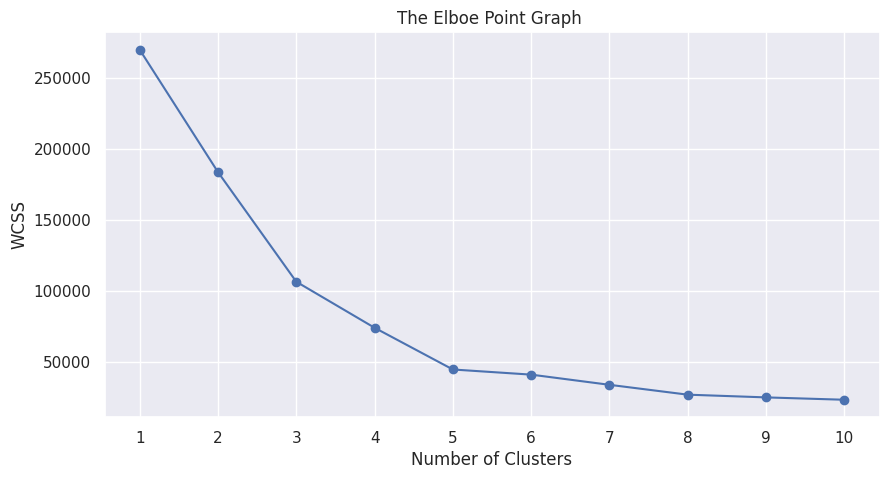

In [ ]:
#plot an elboe grap
sns.set()
plt.figure(figsize=[10,5])
plt.plot(range(1,11),wcss,marker="o")
plt.title("The Elboe Point Graph ")
plt.xlabel("Number of Clusters")
plt.xticks(range(1,11))
plt.ylabel("WCSS")
plt.show()


Optimum Number of Clusters  = 5

In [ ]:
#training the k mean clustering model
km = KMeans(n_clusters=5, init='k-means++',random_state=0)

# return a label for eact data based on their cluster
y = km.fit_predict(x)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

Visualizing all the clusters

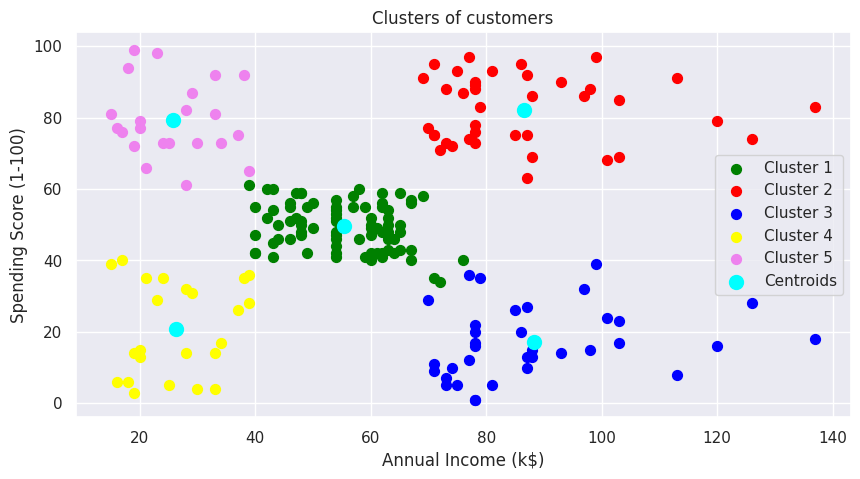

In [ ]:
# Plotting all the clusters and thier Centroids

plt.figure(figsize=[10,5])
plt.scatter(x.iloc[y==0,0],x.iloc[y==0,1], s=50, c="green", label="Cluster 1")
plt.scatter(x.iloc[y==1,0],x.iloc[y==1,1], s=50, c="red", label="Cluster 2")
plt.scatter(x.iloc[y==2,0],x.iloc[y==2,1], s=50, c="blue", label="Cluster 3")
plt.scatter(x.iloc[y==3,0],x.iloc[y==3,1], s=50, c="yellow", label="Cluster 4")
plt.scatter(x.iloc[y==4,0],x.iloc[y==4,1], s=50, c="violet", label="Cluster 5")

#plot the centroid

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s =100,c="cyan", label="Centroids")

plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()